<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [225]:
# загружу библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

Подгружу датасеты.
Известно, что данные находятся в трёх файлах:
- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

In [226]:
gold_recovery_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [227]:
gold_recovery_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [228]:
gold_recovery_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Изучу уникальные значения и количество пропусков в процентах.

In [229]:
# функция для вызова на наличие пропусков и уникальных значений
def show_rows(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
    print('Количество пропусков в каждом столбце')    
    print(data_frame.isna().sum())

In [230]:
show_rows(gold_recovery_train)

Уникальные значения столбца date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Уникальные значения столбца final.output.concentrate_ag
[6.05540276 6.02936857 6.05592607 ... 3.10999751 3.36724104 3.59837494]
Уникальные значения столбца final.output.concentrate_pb
[ 9.88964844  9.9689441  10.21399457 ... 11.43436599 11.62558728
 11.7378318 ]
Уникальные значения столбца final.output.concentrate_sol
[5.50732422 5.25778148 5.38375877 ... 6.88601311 6.79943261 6.71750947]
Уникальные значения столбца final.output.concentrate_au
[42.19202042 42.70162925 42.65750061 ... 46.79569097 46.40818768
 46.29943814]
Уникальные значения столбца final.output.recovery
[70.54121591 69.26619763 68.11644507 ... 67.00218885 65.52324622
 70.28145415]
Уникальные значения столбца final.output.tail_ag
[10.41196156 10.46267568 10.50704594 ...  8.52960609  8.77717133
  8.40668973]
Уникальные значения столбца final.output.tai

In [231]:
show_rows(gold_recovery_test)

Уникальные значения столбца date
['2016-09-01 00:59:59' '2016-09-01 01:59:59' '2016-09-01 02:59:59' ...
 '2017-12-31 21:59:59' '2017-12-31 22:59:59' '2017-12-31 23:59:59']
Уникальные значения столбца primary_cleaner.input.sulfate
[210.800909   215.39245478 215.25994647 ... 171.13571781 179.6971576
 181.55685577]
Уникальные значения столбца primary_cleaner.input.depressant
[14.99311769 14.9874713  12.8849338  ... 15.99366947 15.43897911
 14.99584972]
Уникальные значения столбца primary_cleaner.input.feed_size
[8.07999992 7.78666669 7.63999987 ... 7.88999927 7.57333384 7.96666576]
Уникальные значения столбца primary_cleaner.input.xanthate
[1.00502133 0.99046929 0.99604317 ... 1.16599581 1.50106793 1.62345438]
Уникальные значения столбца primary_cleaner.state.floatbank8_a_air
[1398.98130127 1398.77791158 1398.49366613 ... 1498.83618207 1498.46624268
 1498.09630329]
Уникальные значения столбца primary_cleaner.state.floatbank8_a_level
[-500.22557739 -500.05743464 -500.86835986 ... -501.7704

In [232]:
show_rows(gold_recovery_full)

Уникальные значения столбца date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Уникальные значения столбца final.output.concentrate_ag
[6.05540276 6.02936857 6.05592607 ... 3.10999751 3.36724104 3.59837494]
Уникальные значения столбца final.output.concentrate_pb
[ 9.88964844  9.9689441  10.21399457 ... 11.43436599 11.62558728
 11.7378318 ]
Уникальные значения столбца final.output.concentrate_sol
[5.50732422 5.25778148 5.38375877 ... 6.88601311 6.79943261 6.71750947]
Уникальные значения столбца final.output.concentrate_au
[42.19202042 42.70162925 42.65750061 ... 46.79569097 46.40818768
 46.29943814]
Уникальные значения столбца final.output.recovery
[70.54121591 69.26619763 68.11644507 ... 67.00218885 65.52324622
 70.28145415]
Уникальные значения столбца final.output.tail_ag
[10.41196156 10.46267568 10.50704594 ...  8.52960609  8.77717133
  8.40668973]
Уникальные значения столбца final.output.tai

Рассчитаю эффективность обогащения чернового концентрата rougher.output.recovery из обучающей выборки. Предварительно удалю пропуски из столбцов со значением NaN.

In [233]:
gold_recovery_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14287 non-null  object 
 1   final.output.concentrate_ag                         14282 non-null  float64
 2   final.output.concentrate_pb                         14282 non-null  float64
 3   final.output.concentrate_sol                        14055 non-null  float64
 4   final.output.concentrate_au                         14283 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14287 non-null  float64
 7   final.output.tail_pb                                14173 non-null  float64
 8   final.output.tail_sol                               14279 non-null  float64


In [234]:
concentrate_au_column = gold_recovery_train['rougher.output.concentrate_au']
feed_au_column = gold_recovery_train['rougher.input.feed_au']
tail_au_column = gold_recovery_train['rougher.output.tail_au']
input_recovery = gold_recovery_train['rougher.output.recovery']
calculated_recovery = concentrate_au_column * (feed_au_column - tail_au_column) / feed_au_column / (concentrate_au_column - tail_au_column) * 100
print('Абсолютная средняя ошибка =', mean_absolute_error(input_recovery, calculated_recovery))

Абсолютная средняя ошибка = 1.035865202282935e-14


MAE имеет очень малое отклонение - это значит, что расчетное значение rougher.output.recovery совпадает с данными из столбца.

Удалю пропущенные значения в обучающей и тестовой выборке.

In [235]:
good_gold_recovery_train = gold_recovery_train.dropna()
good_gold_recovery_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [236]:
good_gold_recovery_test = gold_recovery_test.dropna()
good_gold_recovery_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

В тестовой выборке отсуствуют столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. Эти данные будут получены позже, по результатам технологического процесса. Это онлайн метрики. Остальные столбцы исторически известны - значит это офлайн метрики.

Выделю столбцы из тестовой выборки, по которым будет обучаться модель. Столбец data не несет смысла для обучающей модели. Для предсказания rougher.output.recovery будут использоваться данные из стобцов этапа rougher. Для вычисления final.output.recovery будут использованы все столбцы из тестовой выборки.

In [237]:
features_columns = good_gold_recovery_test.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns = set(features_columns)
print(rougher_features_columns)
print()
print(final_features_columns)

{'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_c_level', 'rougher.input.feed_pb', 'rougher.input.feed_ag', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_d_level', 'rougher.input.feed_au', 'rougher.state.floatbank10_e_air', 'rougher.input.floatbank11_sulfate', 'rougher.input.feed_sol', 'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.input.feed_size', 'rougher.state.floatbank10_b_level', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_c_air', 'rougher.input.feed_rate'}

{'secondary_cleaner.state.floatbank3_b_air', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.state.floatbank8_b_air', 'rougher.state.floatbank10_b_air', 'primary_

Пройдусь и визуализирую по ключевым столбцам в обучающей выборке.

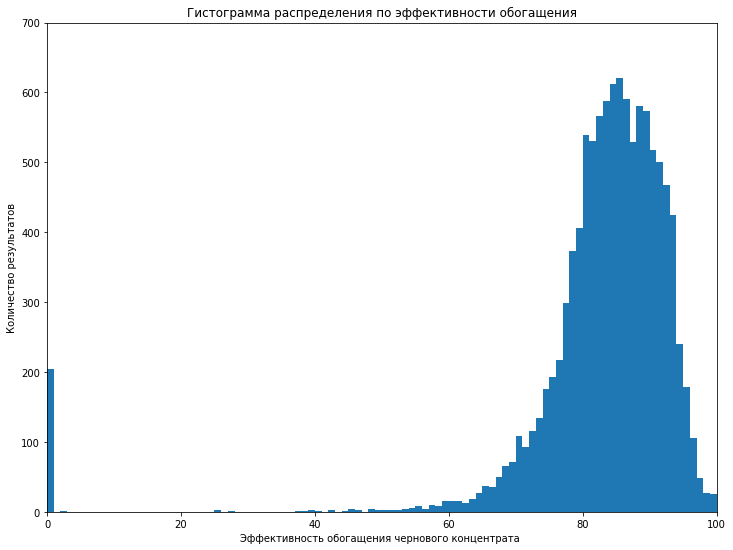

In [238]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 700])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Изучу нулевые значения в столбце rougher.output.recovery.

In [239]:
good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
51,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
52,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
836,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


In [240]:
good_gold_recovery_train[good_gold_recovery_train['rougher.output.concentrate_au'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
51,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
52,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
836,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


В данных нет информации о этапе rougher. Удалю эти значения, так как они могут исказить данные.

In [241]:
# проверка на наличие
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


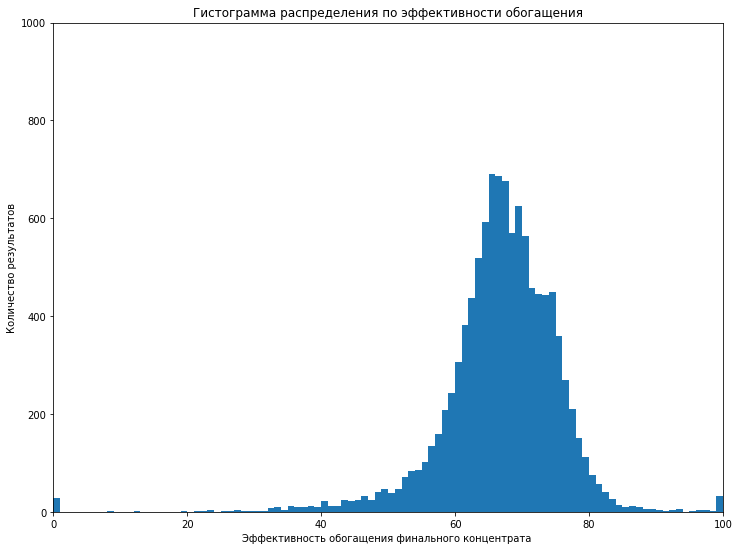

In [242]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

In [243]:
good_gold_recovery_train[good_gold_recovery_train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
707,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1354,2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1355,2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
1356,2016-03-11 12:00:00,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011
1357,2016-03-11 13:00:00,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,...,11.993898,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405


In [244]:
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['final.output.recovery'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [245]:
good_gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                10784 non-null  object 
 1   final.output.concentrate_ag                         10784 non-null  float64
 2   final.output.concentrate_pb                         10784 non-null  float64
 3   final.output.concentrate_sol                        10784 non-null  float64
 4   final.output.concentrate_au                         10784 non-null  float64
 5   final.output.recovery                               10784 non-null  float64
 6   final.output.tail_ag                                10784 non-null  float64
 7   final.output.tail_pb                                10784 non-null  float64
 8   final.output.tail_sol                               10784 non-null  float64


Проверю есть ли нулевые значения в primary_cleaner.output и secondary_cleaner.output.

In [246]:
good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

109

In [247]:
good_gold_recovery_train[good_gold_recovery_train['secondary_cleaner.output.tail_au'] < 1]['secondary_cleaner.output.tail_au'].count()

426

По данным этапам тоже присутвуют нулевые значения. Но так как они не являются целью модели и не входят в список столбцов обучающей модели, оставим их без изменения.

**Вывод**

В данных присутвовали аномалии:

- Пропущенные значение;
- Нулевые значения на ключевых этапах;
- Неподходящие данные были удалены. Возможно не были сняты данные по выбранным этапам или они еще не были получены в результате работы системы.

Данные готовы к дальнейшему анализу.

## Анализ данных

Визуализирую и посмотрю концентрацию веществ на каждом этапе.

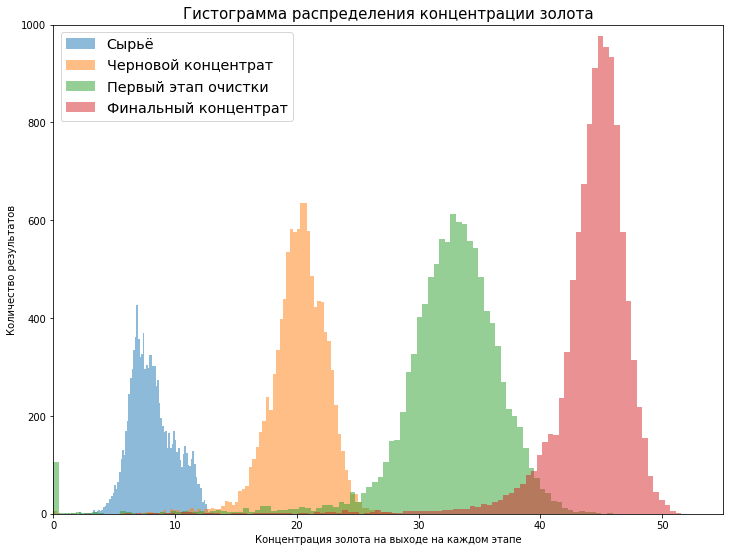

In [248]:
plt.figure(figsize=[12,9])
    
plt.hist(good_gold_recovery_train['rougher.input.feed_au'], bins=100, label = 'Сырьё', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_au'], bins=100, label = 'Черновой концентрат', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'Первый этап очистки',
         alpha=.5)
plt.hist(good_gold_recovery_train['final.output.concentrate_au'], bins=100, label = 'Финальный концентрат', alpha=.5)
    
    
plt.xlim([0, 55])
plt.ylim([0, 1000])
    
plt.xlabel('Концентрация золота на выходе на каждом этапе')
plt.ylabel('Количество результатов')
    
plt.legend(loc='upper left', fontsize='x-large')
    
plt.title('Гистограмма распределения концентрации золота', fontsize=15)
plt.show()

Концентрация золота повышается с каждым этапом. Цель флотации и очисток - увеличить концентрацию золота.

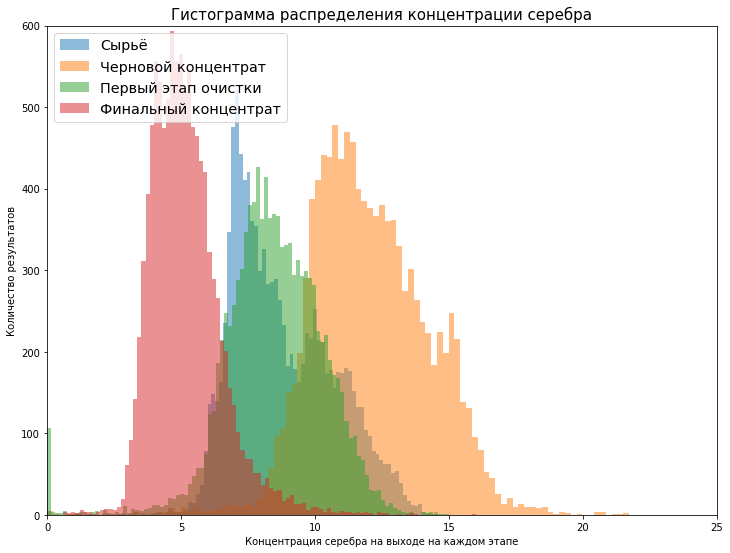

In [249]:
plt.figure(figsize=[12,9])
    
plt.hist(good_gold_recovery_train['rougher.input.feed_ag'], bins=100, label = 'Сырьё', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_ag'], bins=100, label = 'Черновой концентрат', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Первый этап очистки',
         alpha=.5)
plt.hist(good_gold_recovery_train['final.output.concentrate_ag'], bins=100, label = 'Финальный концентрат', alpha=.5)
    
    
plt.xlim([0, 25])
plt.ylim([0, 600])
    
plt.xlabel('Концентрация серебра на выходе на каждом этапе')
plt.ylabel('Количество результатов')
    
plt.legend(loc='upper left', fontsize='x-large')
    
plt.title('Гистограмма распределения концентрации серебра', fontsize=15)
plt.show()

Конецентрация серебра понижается с каждым шагом очистки. Так как основным металом является золото, то остальные металлы и соединения должны быть отфильтрованы и их значение снижено.

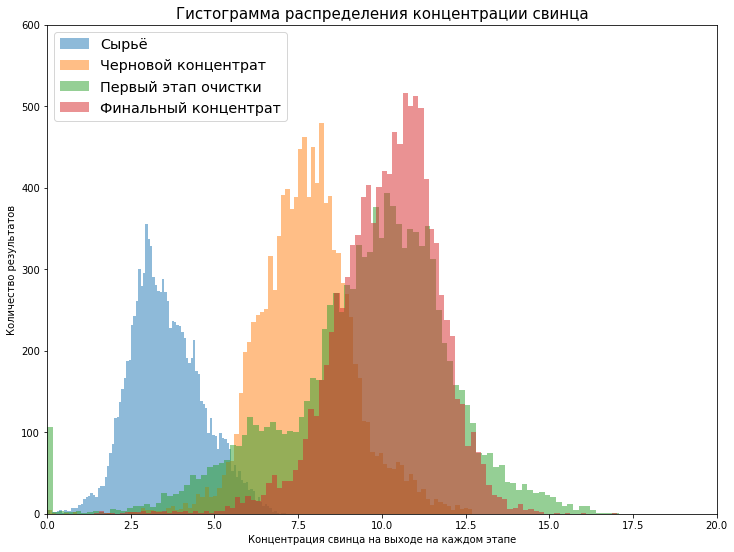

In [250]:
plt.figure(figsize=[12,9])
    
plt.hist(good_gold_recovery_train['rougher.input.feed_pb'], bins=100, label = 'Сырьё', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_pb'], bins=100, label = 'Черновой концентрат', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Первый этап очистки',
         alpha=.5)
plt.hist(good_gold_recovery_train['final.output.concentrate_pb'], bins=100, label = 'Финальный концентрат', alpha=.5)
    
    
plt.xlim([0, 20])
plt.ylim([0, 600])
    
plt.xlabel('Концентрация свинца на выходе на каждом этапе')
plt.ylabel('Количество результатов')
    
plt.legend(loc='upper left', fontsize='x-large')
    
plt.title('Гистограмма распределения концентрации свинца', fontsize=15)
plt.show()

Концентрация свинца повышается с этапа rougher до primary_cleaner. И потом усредняется. Это связано с химическим процесами очищения золота. При использование азотнокислого выщелачивания в концентрате образуется много сульфата свинца. Повышение концентрации свинца в целом происходит не только из-за этого процесса, но из-за очищения других составляющих из золотоносной руды.

Изучу размеры сырья на этапах обработки.

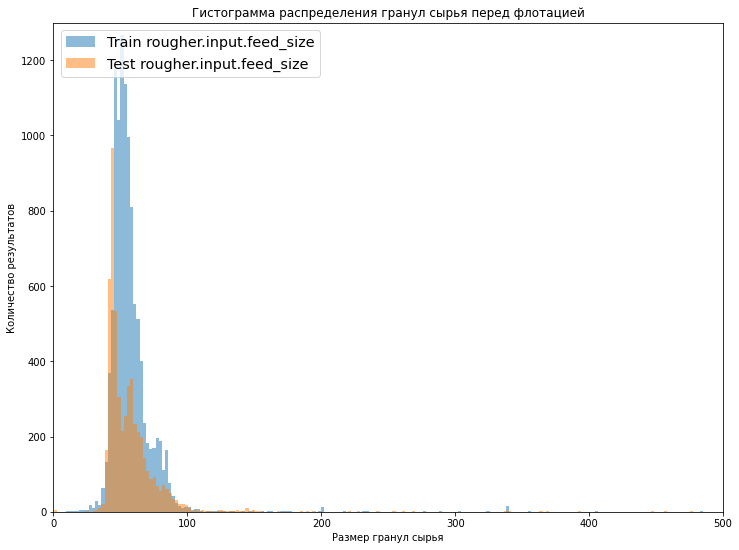

In [251]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['rougher.input.feed_size'], bins=200, label = 'Train rougher.input.feed_size', alpha=.5)
plt.hist(good_gold_recovery_test['rougher.input.feed_size'], bins=200, label = 'Test rougher.input.feed_size', alpha=.5)

plt.xlim([0, 500])
plt.ylim([0, 1300])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

Распределение гранул до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Существуют выбросы после размера гранул 100.

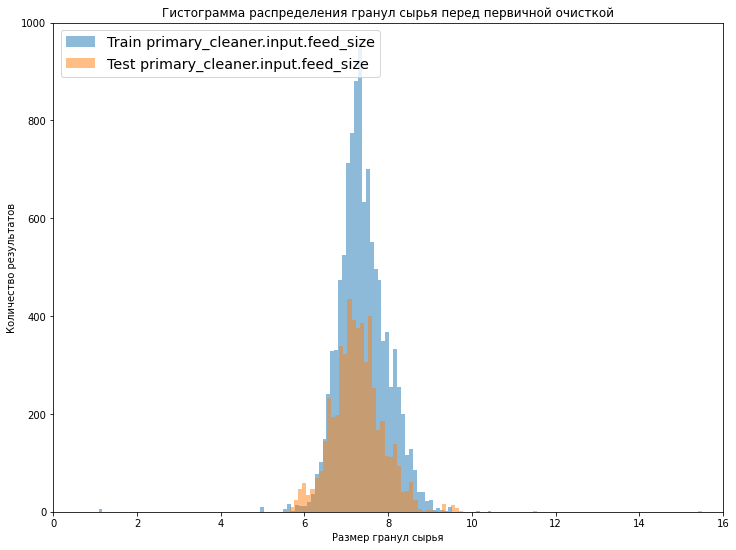

In [252]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=.5)
plt.hist(good_gold_recovery_test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=.5)

plt.xlim([0, 16])
plt.ylim([0, 1000])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
plt.show()

Размеры гранул перед первичной очисткой обладают нормальным распределением.

Подготовлю столбцы с финальными концентрациями в обучающей выборке.

In [253]:
final_output_concentrate_sum_train = (good_gold_recovery_train['final.output.concentrate_au'] + 
                                      good_gold_recovery_train['final.output.concentrate_ag'] + 
                                      good_gold_recovery_train['final.output.concentrate_pb'] +
                                      good_gold_recovery_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (good_gold_recovery_train['primary_cleaner.output.concentrate_au'] + 
                                                good_gold_recovery_train['primary_cleaner.output.concentrate_ag'] + 
                                                good_gold_recovery_train['primary_cleaner.output.concentrate_pb'] +
                                                good_gold_recovery_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (good_gold_recovery_train['rougher.output.concentrate_au'] + 
                                        good_gold_recovery_train['rougher.output.concentrate_ag'] + 
                                        good_gold_recovery_train['rougher.output.concentrate_pb'] +
                                        good_gold_recovery_train['rougher.output.concentrate_sol'])

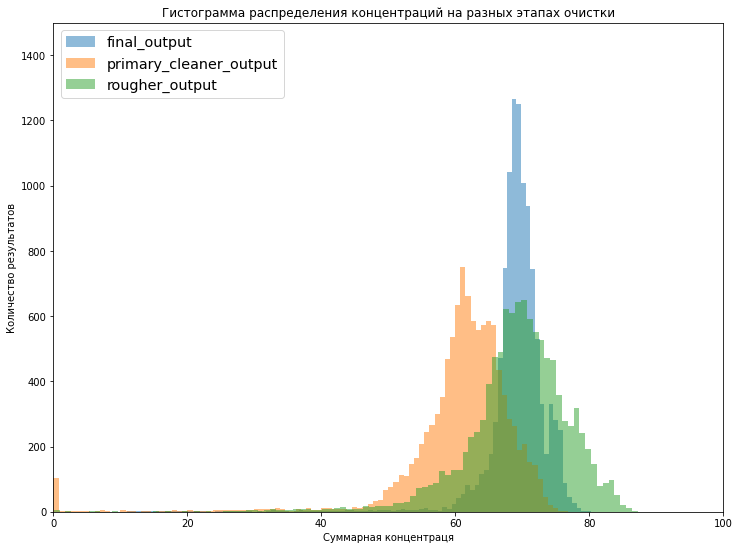

In [254]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

По графику видно, что из аномалий много значений в 0.

На этапе предобрабоки были найдены строки с нулевыми значениями в primary_cleaner.output. Эти же строки показывают суммарную концентрацию равную 0. Соответственно они являются аномалией. Удалю их.

In [255]:
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


**Вывод**

В результате анализа были изучены:

- Концетрации основных веществ на разных этапах очистки.
- Размер гранул тестовой и обучающей выборки.
- Суммарная концентрация веществ.

Аномалии были удалены. Данные подготовлены к обучению.

## Модель

Создам разделение признаков для предсказания rougher.output.recovery и final.output.recovery.

In [256]:
# Подготовка признаков для final.output.recovery
columns_to_delete = set(good_gold_recovery_train.columns) - final_features_columns
print(columns_to_delete)
train_features_final = good_gold_recovery_train.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)
# Проверка вхождения всех столбцов из feateures в столбцах тестовой выборки
print(set(train_features_final.columns) - set(gold_recovery_test.columns))

# Подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_ag', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_au', 'rougher.output.concentrate_pb', 'final.output.concentrate_ag', 'rougher.output.tail_ag', 'rougher.output.concentrate_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_sol', 'secondary_cleaner.output.tail_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'rougher.output.recovery', 'primary_cleaner.output.concentrate_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_sol', 'rougher.output.tail

In [257]:
# Подготовлю целевой признак
train_target_final = good_gold_recovery_train['final.output.recovery']
train_target_rougher = good_gold_recovery_train['rougher.output.recovery']

# Подготовлю признаки тестовой выборки
test_features = good_gold_recovery_test.drop('date', axis=1)


In [258]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

{'secondary_cleaner.state.floatbank3_b_air', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.input.depressant', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_level', 'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.state.floatbank8_d_air', 'secondary_cleaner.state.floatbank4_b_air', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.state.floatbank2_a_air', 'primary_cleaner.state.floatbank8_a_air', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank6_a_level', 'secondary_cleaner.state.floatbank5_a_level', 'primary_cleaner.input.feed_size', 'secondary_cleaner.state.floatbank2_b_leve

In [259]:
# Функция вычисления симметричного среднего абсолютного процентного отклонения
def sMAPE(y_true, y_pred):
    smape_score = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return smape_score

In [260]:
def total_sMAPE(sMAPE_rougher, sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

Это задача регресии. Поэтому выберу следующие модели для обучения:

- Линейная регрессия
- Полиноминальная регрессия. Применется на линейной регрессии с подготовленными признаками
- Регрессия Ridge
- DecisionTreeRegressor

Теперь буду выполнять поиск лучшей модели

In [261]:
custom_score = make_scorer(sMAPE, greater_is_better=False)

In [262]:
%%time

regressor = LinearRegression()
print('Mean R2 from CV of LinearRegression =', cross_val_score(regressor, train_features_final,
                                                               train_target_final, cv=5).mean())
print('Mean scoring from CV of LinearRegression =', cross_val_score(regressor, train_features_final, 
                                                                train_target_final, cv=5, scoring=custom_score).mean())

Mean R2 from CV of LinearRegression = -0.19455349428687413
Mean MAE from CV of LinearRegression = -9.018601124709084
CPU times: user 849 ms, sys: 1.68 s, total: 2.53 s
Wall time: 2.53 s


Проверю влияние масштаба признаков на качество модели

In [263]:
%%time

regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
print('Mean R2 from CV of LinearRegression =', cross_val_score(pipeline, train_features_final,
                                                               train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(pipeline, train_features_final, 
                                                                train_target_final, cv=5, scoring=custom_score).mean())


Mean R2 from CV of LinearRegression = -0.19455349428688795
Mean MAE from CV of LinearRegression = -9.018601124709132
CPU times: user 963 ms, sys: 1.83 s, total: 2.79 s
Wall time: 2.8 s


Масштаб признаков не влияет.

In [264]:
%%time

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
print('Mean R2 from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, 
                                                                                 train_features_final, 
                                                                                 train_target_final, cv=5).mean())
print('Mean MAE from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final,
                                                                                  train_target_final, cv=5, 
                                                                                  scoring=custom_score).mean())

Mean R2 from CV of PolynomialRegression with 2 degree = -53.89653171574984
Mean MAE from CV of PolynomialRegression with 2 degree = -47.70415476751319
CPU times: user 1min 17s, sys: 55.9 s, total: 2min 12s
Wall time: 2min 13s


Для регрессоров Ridge и DecisionTreeRegressor буду применять метод GridSearchCV. В нем уже вложена кросс-валидация.

In [265]:
%%time

regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]

scores = ['r2', 'neg_mean_absolute_error']

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()
    clf = GridSearchCV(regressor, hyperparams, scoring=make_scorer(sMAPE, greater_is_better=False))
    clf.fit(train_features_final, train_target_final)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'alpha': 1, 'solver': 'sparse_cg'}

Grid scores on development set:

-9.019 (+/-2.932) for {'alpha': 0.1, 'solver': 'auto'}
-9.018 (+/-2.931) for {'alpha': 1, 'solver': 'auto'}
-9.015 (+/-2.922) for {'alpha': 10, 'solver': 'auto'}
-8.985 (+/-2.831) for {'alpha': 100, 'solver': 'auto'}
-9.019 (+/-2.932) for {'alpha': 0.1, 'solver': 'svd'}
-9.018 (+/-2.931) for {'alpha': 1, 'solver': 'svd'}
-9.015 (+/-2.922) for {'alpha': 10, 'solver': 'svd'}
-8.985 (+/-2.831) for {'alpha': 100, 'solver': 'svd'}
-9.019 (+/-2.932) for {'alpha': 0.1, 'solver': 'cholesky'}
-9.018 (+/-2.931) for {'alpha': 1, 'solver': 'cholesky'}
-9.015 (+/-2.922) for {'alpha': 10, 'solver': 'cholesky'}
-8.985 (+/-2.831) for {'alpha': 100, 'solver': 'cholesky'}
-9.309 (+/-1.831) for {'alpha': 0.1, 'solver': 'lsqr'}
-9.309 (+/-1.831) for {'alpha': 1, 'solver': 'lsqr'}
-9.309 (+/-1.831) for {'alpha': 10, 'solver': 'lsqr'}
-9.309 (+/-1.833) for {'

In [266]:
%%time

regressor = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'criterion':['mse'], 'max_depth':max_depth_list, 'random_state':[12345]},
               {'criterion':['mae'], 'max_depth':max_depth_list, 'random_state':[12345]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'criterion': 'mae', 'max_depth': 2, 'random_state': 12345}

Grid scores on development set:

-0.235 (+/-0.384) for {'criterion': 'mse', 'max_depth': 2, 'random_state': 12345}
-0.305 (+/-0.563) for {'criterion': 'mse', 'max_depth': 4, 'random_state': 12345}
-0.399 (+/-0.614) for {'criterion': 'mse', 'max_depth': 6, 'random_state': 12345}
-0.668 (+/-1.238) for {'criterion': 'mse', 'max_depth': 8, 'random_state': 12345}
-1.144 (+/-1.398) for {'criterion': 'mse', 'max_depth': 10, 'random_state': 12345}
-1.538 (+/-1.647) for {'criterion': 'mse', 'max_depth': 12, 'random_state': 12345}
-1.343 (+/-1.419) for {'criterion': 'mse', 'max_depth': 14, 'random_state': 12345}
-1.491 (+/-1.228) for {'criterion': 'mse', 'max_depth': 16, 'random_state': 12345}
-1.609 (+/-1.451) for {'criterion': 'mse', 'max_depth': 18, 'random_state': 12345}
-1.930 (+/-2.500) for {'criterion': 'mse', 'max_depth': 20, 'random_state': 12345}
-0.030

Проверю лучшие модели по метрикам на созданной метрике sMAPE. Проверю реальные данные.

In [267]:
rougher_recovery_real = gold_recovery_full.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = gold_recovery_full.loc[test_features_final.index,'final.output.recovery']
print('Процент пропусков в общей выборке', rougher_recovery_real.isna().mean())
print('Процент пропусков в общей выборке', final_recovery_real.isna().mean())

Процент пропусков в общей выборке 0.14397176295745867
Процент пропусков в общей выборке 0.10477428942968604


В реальной таблице отсутсвуют зачения для выборки. Они будут игнорироваться при расчете sMAPE.

In [276]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии', sMAPE(rougher_recovery_real, rougher_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии', sMAPE(rougher_recovery_real, rougher_recovery_predicted))

model_rd = Ridge(alpha=1, solver='sparse_cg')
model_rd.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted_rd = model_rd.predict(test_features_rougher)
model_rd.fit(train_features_final, train_target_final)
final_recovery_predicted_rd = model_rd.predict(test_features_final)
sMAPE_rd = sMAPE(rougher_recovery_real, rougher_recovery_predicted)
print('sMAPE для регресии Ridge', sMAPE_rd)

model_tree = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=12345)
model_tree.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model_tree.predict(test_features_rougher)
model_tree.fit(train_features_final, train_target_final)
final_recovery_predicted = model_tree.predict(test_features_final)
sMAPE_tree = sMAPE(rougher_recovery_real, rougher_recovery_predicted)
print('sMAPE для DecisionTreeRegressor', sMAPE_tree)

sMAPE для линейной регресии 14.612198687884215
sMAPE для полиноминальной регресии 17.605324333147536
sMAPE для регресии Ridge 17.605324333147536
sMAPE для DecisionTreeRegressor 14.60199260746918
CPU times: user 33.2 s, sys: 3.91 s, total: 37.1 s
Wall time: 37.3 s


Создам константную модель на медианных значениях. Изменю код функции для подсчета.

In [269]:
median_rougher_recovery = gold_recovery_full['rougher.output.recovery'].median()
median_final_recovery = gold_recovery_full['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для медианной константной модели 11.437793816641223


Проведу сокращение тестовой выборки из-за пропущенных значений rougher.output.recovery и final.output.recovery в полном датафрейме. Для вычисления sMAPE длина и индексы всех серий должны быть одинаковы.

In [270]:
rougher_recovery_real.dropna(inplace=True)
print('Количество строк rougher_recovery_real =', rougher_recovery_real.shape[0])
final_recovery_real.dropna(inplace=True)
print('Количество строк final_recovery_real =', final_recovery_real.shape[0])
print('Количество строк test_features_rougher =', test_features_rougher.shape[0])

not_nan_index = set(test_features_rougher.index)
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))
print('Количество индексов с полными данными=', len(not_nan_index))

Количество строк rougher_recovery_real = 4608
Количество строк final_recovery_real = 4819
Количество строк test_features_rougher = 5383
Количество индексов с полными данными= 4554


Преобразую количество данных тестовой выбоки и рельных так, чтобы не было NaN.

In [271]:
rougher_recovery_real = gold_recovery_full.loc[not_nan_index,'rougher.output.recovery']
final_recovery_real = gold_recovery_full.loc[not_nan_index,'final.output.recovery']
test_features_rougher = test_features_rougher.loc[not_nan_index,:]
test_features_final = test_features_final.loc[not_nan_index,:]
print('Количество строк test_features_final =', test_features_final.shape[0])

Количество строк test_features_final = 4554


Повторю получение sMAPE на тех же моделях.

In [277]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии', sMAPE(rougher_recovery_real, rougher_recovery_predicted))


regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии', sMAPE(rougher_recovery_real, rougher_recovery_predicted))


model_rd_final = Ridge(alpha=1, solver='sparse_cg')
model_rd_final.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model_rd_final.predict(test_features_rougher)
model_rd_final.fit(train_features_final, train_target_final)
final_recovery_predicted_rd = model_rd_final.predict(test_features_final)
sMAPE_rd_final = sMAPE(rougher_recovery_real, rougher_recovery_predicted)
print('sMAPE для регресии Ridge', sMAPE_rd_final)


model_tree_final = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=12345)
model_tree_final.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model_tree_final.predict(test_features_rougher)
model_tree_final.fit(train_features_final, train_target_final)
final_recovery_predicted = model_tree_final.predict(test_features_final)
sMAPE_tree_final = sMAPE(rougher_recovery_real, rougher_recovery_predicted)
print('sMAPE для DecisionTreeRegressor', sMAPE_tree_final)


n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для линейной регресии 14.612198687884215
sMAPE для полиноминальной регресии 17.605324333147536
sMAPE для регресии Ridge 14.54727570320215
sMAPE для DecisionTreeRegressor 14.60199260746918
sMAPE для медианной константной модели 12.236756621839444
CPU times: user 33.3 s, sys: 4.33 s, total: 37.6 s
Wall time: 38.7 s


Сравню модель Ridge c медианной константной по метрикам R2 и MAE. Проверю показания на final_recovery_real.

In [279]:
model_rd_final = Ridge(alpha=1, solver='sparse_cg')
model_rd_final.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('R2 Ridge model =', r2_score(final_recovery_real, final_recovery_predicted))
print('MAE Ridge model =', mean_absolute_error(final_recovery_real, final_recovery_predicted))
print()

final_median_predict = pd.Series(median_final_recovery, index=not_nan_index)
print('R2 constant model =', r2_score(final_recovery_real, final_median_predict))
print('MAE constant model =', mean_absolute_error(final_recovery_real, final_median_predict))

R2 Ridge model = -41.54593084728279
MAE Ridge model = 23.803166047755482

R2 constant model = -0.16953176961687788
MAE constant model = 6.986583173406041


In [274]:
best_final_model = model_rd_final
best_final_smape = sMAPE_rd_final

In [281]:
print('Итоговое sMAPE на лучшей модели: {:.2f}%'.format(total_sMAPE(sMAPE_rd, best_final_smape)))

Итоговое sMAPE на лучшей модели: 15.31%


**Вывод**

Была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска гиперпараметров GridSearchCV.

Была отобрана лучшая модель - DecisionTreeRegressor. Ее значение sMAPE самое низкое.

Но после удаления значений NaN модель изменила свои значения. В полных данных отсутвует 14% и 10% данных по предсказаниям, возможно это повлияло на качество модели. И поэтому была выбрана другая модель - Ridge.

## Вывод

В ходе работы было выполнено:

- Подготовлены данные.
- Проведен исследовательский анализ данных.
- Построена и обучена модель.

Регрессор Ridge показал себя лучше обычной линейной регресии. sMAPE показал 17.6 до того как убрать пропущенные значения, и 14.55 после. Если сравнивать с константной моделью, то значение проигрывает. Другие метрики тоже говорят о том, что константная модель адекватнее выбранной.